## BMIS-2542: Data Programming Essentials with Python
##### Katz Graduate School of Business


## Session-6: Variable Selection Practice Exercise

#### Boston Housing Data:

This exercise is based on the `boston.csv` data file available on Canvas.The Boston housing data set provides records of 13 attributes of housing markets around Boston, as well as the median price. </br>
**Complete the given questions as much as you can and upload your notebook to Canvas, at the end of the class**.

<u>Data Set Characteristics</u>:  

Number of Instances: 506 <br>
Number of Attributes: 13 numeric/categorical predictive<br>
Attribute Information (in order):
 * CRIM:     per capita crime rate by town
 * ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
 * INDUS:    proportion of non-retail business acres per town
 * CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 * NOX:      nitric oxides concentration (parts per 10 million)
 * RM:       average number of rooms per dwelling
 * AGE:      proportion of owner-occupied units built prior to 1940
 * DIS:      weighted distances to five Boston employment centres
 * RAD:      index of accessibility to radial highways
 * TAX:      full-value property-tax rate per ten thousand dollars
 * PTRATIO:  pupil-teacher ratio by town
 * B:        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 * LSTAT:    % lower status of the population
 * MEDV:     Median value of owner-occupied homes in 1000's
 * Missing Attribute Values: None


In [1]:
# import modules
import pandas as pd
import numpy as np

import statsmodels.api as sm

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

import sklearn.linear_model as sklm
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
# Load data
df_boston = pd.read_csv('/content/drive/MyDrive/My Pitt/Python Programming/All Datasets/BostonHousing.csv')
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


Q1. Use the dataset "BostonHousing.csv" for this question. Perform variable selection using linear regression (use "exhaustive search" approach for this). Use "MEDV" as the outcome variable and rest of the variables as predictor variables.

**Note:** Please remove "CAT. MEDV" variable from the x-variables, becasuse this is just the categorical representation of the MEDV variable.

In [50]:
df_boston = df_boston.drop(['CAT. MEDV'], axis = 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


Import Exhaustive Search

In [16]:
!pip install dmba
from dmba import regressionSummary, exhaustive_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 49.7 MB/s eta 0:00:00
Colab environment detected.


In [51]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [82]:
train_X = df_boston.iloc[:, :12]
train_y = df_boston['MEDV']

In [83]:
train_y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [84]:
def train_model(variables):
    model = sklm.LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

In [85]:
allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)
results

[{'n': 1,
  'variables': ['LSTAT'],
  'score': -0.5432418259547068,
  'model': LinearRegression()},
 {'n': 2,
  'variables': ['RM', 'LSTAT'],
  'score': -0.6371244754701231,
  'model': LinearRegression()},
 {'n': 3,
  'variables': ['RM', 'PTRATIO', 'LSTAT'],
  'score': -0.6767035874132712,
  'model': LinearRegression()},
 {'n': 4,
  'variables': ['RM', 'DIS', 'PTRATIO', 'LSTAT'],
  'score': -0.6878351084841281,
  'model': LinearRegression()},
 {'n': 5,
  'variables': ['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'],
  'score': -0.7051701822464959,
  'model': LinearRegression()},
 {'n': 6,
  'variables': ['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'],
  'score': -0.712356667191387,
  'model': LinearRegression()},
 {'n': 7,
  'variables': ['ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'],
  'score': -0.7156819602370053,
  'model': LinearRegression()},
 {'n': 8,
  'variables': ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'],
  'score': -0.7191751471563073,
  'model': LinearR

Train Data

In [86]:
data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)

    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)

In [87]:
searchresults=pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables)))

In [88]:
searchresults

,n,r2adj,AIC,AGE,CHAS,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN
0,1,0.543242,3288.974957,False,False,False,False,False,True,False,False,False,False,False,False
1,2,0.637124,3173.542314,False,False,False,False,False,True,False,False,False,True,False,False
2,3,0.676704,3116.097267,False,False,False,False,False,True,False,True,False,True,False,False
3,4,0.687835,3099.359045,False,False,False,True,False,True,False,True,False,True,False,False
4,5,0.705170,3071.438633,False,False,False,True,False,True,True,True,False,True,False,False
5,6,0.712357,3059.939050,False,True,False,True,False,True,True,True,False,True,False,False
6,7,0.715682,3055.040330,False,True,False,True,False,True,True,True,False,True,False,True
7,8,0.719175,3049.767923,False,True,True,True,False,True,True,True,False,True,False,True
8,9,0.723361,3043.149990,False,False,True,True,False,True,True,True,True,True,True,True
9,10,0.728873,3033.944058,False,True,True,True,False,True,True,True,True,True,True,True


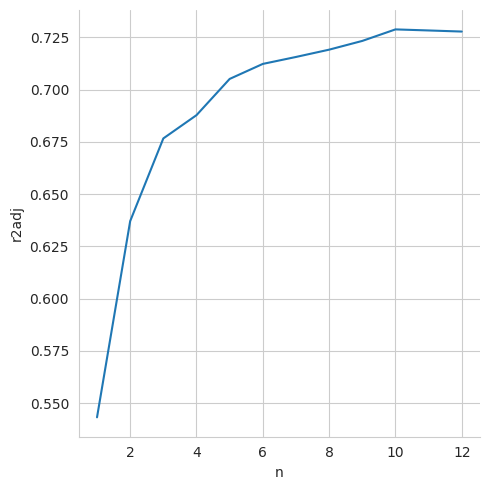

In [89]:
sns.relplot(x="n", y="r2adj", data=searchresults, kind="line")

Q2. How many variables should we select in the final regression? Which variables are these?
Note: Answer only in plain english (no need to write code for this).

In my opinion, ten variables that includes 'CRIM',
   'ZN',
   'CHAS',
   'NOX',
   'RM',
   'DIS',
   'RAD',
   'TAX',
   'PTRATIO',
   'LSTAT' for the model is a better option.